In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../")
import copy

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import ReactionNetwork
from steric_free_simulator import EquilibriumSolver

/home/spencerloggia/Projects/biphy/multi_assembly/steric_free_simulator/energy_space_explorer.py:8: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.relax import *


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B

In [3]:
base_input = './input_files/dimer.bngl'
rn = ReactionNetwork(base_input, one_step=True, seed=424242)


Since this is a toy model, assign some random $\Delta G$ to the reaction.

In [4]:
rn.reset()
rn.intialize_activations()


<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.

**Optimization and Simulation Parameters**:

- **sim_runtime**: time (in seconds) that the simulation will run for.
- **optim_iterations**: number of simlations to run, optimizing parameters at each one.
- **learning rate**: factor to multiply calculated gradients by.
- **score_constant**: A coefficient applied to each rosetta calculated score, can be thought of a converting rosseta units to Joules. Since we have no idea what this really should be, it should be set to make $\Delta G$ for each reaction realistic.
- **freq_factor**: pre-exponential factor when calculating rate constants, physically a measure of the frequency of collisions between molecules.
- **volume**: The volume of each simulation, used when calculating concentraions from copy numbers
- **device**: The hardware device to run simulations and optimizations on.

If the parameter is not specified at optimizer construction, it is given a default value.

In [5]:
# I am using an adam optimizer, which will choose the best
# learning rate and momentum parameters as the simulations run,
# So the initial choice of learning rate doesn't matter that much

optim = Optimizer(reaction_network=rn,
                  sim_runtime=.1,
                  optim_iterations=10,
                  learning_rate=.1,
                  sim_mode='vectorized',
                  score_constant=1)
optim.rn.update_reaction_net(rn, scalar_modifier=1)

Using CPU


In [6]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 7 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 8 was 99.8%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 9 was 99.8%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

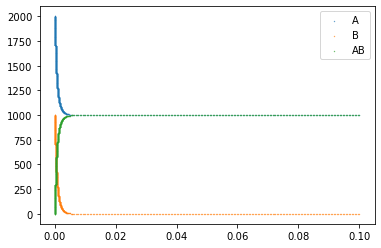

In [7]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

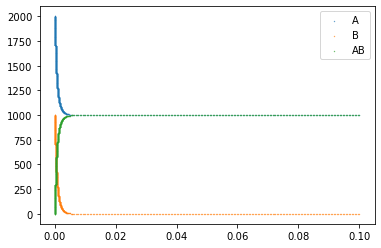

In [8]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

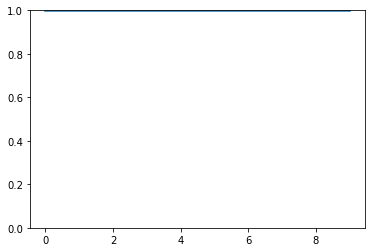

In [9]:
optim.plot_yield()

<h3> Summary of dimer test</h3>
The dimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.

<h2> Load basic Trimer info </h2>
Specifies reactions

 - A + B <--> AB
 - B + C <--> BC
 - A + C <--> AC
 - AB + C <--> ABC
 - BC + A <--> ABC
 - AC + B <--> ABC

With starting copy numbers of:

 - A: 1000
 - B: 1000
 - C: 1000

In [3]:
base_input = './input_files/trimer.bngl'
rn = ReactionNetwork(base_input, one_step=True, seed=123456)

Since this is a toy model, assign some random $\Delta Gs$ to each reaction.

In [4]:
rn.reset()
rn.is_energy_set = True

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>

In [13]:
rn.intialize_activations()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=2,
                  optim_iterations=10,
                  learning_rate=.1,
                  score_constant=100,
                  sim_mode='vectorized')

# update rn params to match computed rate constants
optim.rn.update_reaction_net(rn, scalar_modifier=100)

Using CPU


In [14]:
optim.optimize()
final_rn = copy.deepcopy(rn)
optim.rn.update_reaction_net(final_rn, 100)

Using CPU
yield on sim iteration 0 was 92.6%
current params: tensor([1.1000, 1.1000, 1.1000, 1.1000, 1.1000, 1.1000], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 92.6%
current params: tensor([1.2000, 1.1936, 1.2000, 1.2000, 1.2000, 1.2000], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 92.6%
current params: tensor([1.3000, 1.2790, 1.3000, 1.3000, 1.3000, 1.3000], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 92.6%
current params: tensor([1.4000, 1.3557, 1.4000, 1.4000, 1.4000, 1.4000], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 92.7%
current params: tensor([1.5000, 1.4243, 1.5000, 1.5000, 1.5000, 1.5000], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 92.7%
current params: tensor([1.6000, 1.4855, 1.6000, 1.6000, 1.6000, 1.6000], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 92.7%
current params: tensor([1.7000, 1.5402, 1.7000, 1.7000, 1.7000, 1.7000], dtype=torch.float64)
Using CPU
yield on sim iter

<h3> Plot the simulation at the first iteration (before optimization) </h3>

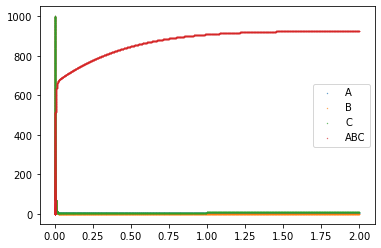

In [15]:
optim.plot_observable(iteration=0)

<h3> Plot the simulation at the last iteration (after all optimization) </h3>

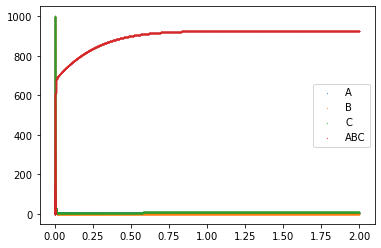

In [16]:
optim.plot_observable(iteration=-1)

<h3> Plot the yield curve over all iterations </h3>

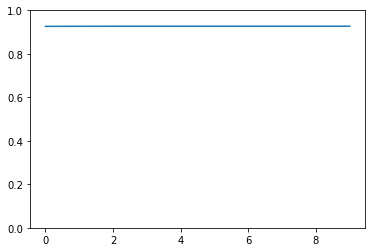

In [17]:
optim.plot_yield()

In [6]:
eq_sol = EquilibriumSolver(rn)
solution = eq_sol.solve()
eq_yield = solution[-1]


<h3> Summary of Trimer test</h3>
The trimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.


<h2> AP2 Optimization </h2>
See the ap2_optimization ipython notebook in this repo
